<a href="https://colab.research.google.com/github/krmonline/AnomalyDetection/blob/master/Anomaly_LOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
cpu = pd.read_csv("https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv")

In [ ]:
cpu2 = cpu.value.values.reshape(-1,288)

n_neighbors  หรือค่า k หมายถึงใช้สมาชิก 20 จุดในการคำนวณ  LOF

contamination  0.03 หมายถึงให้หา outlier ออกมา 3% จาก Data ทั้งหมด

In [ ]:
X = cpu2[4]
Y = cpu2[5]
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
y_pred = clf.fit_predict(np.asarray([X,Y]).T)

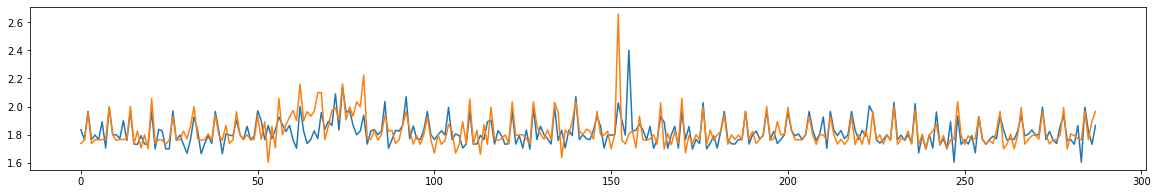

In [ ]:
plt.figure(figsize=(20, 3))
plt.plot(X)
plt.plot(Y)

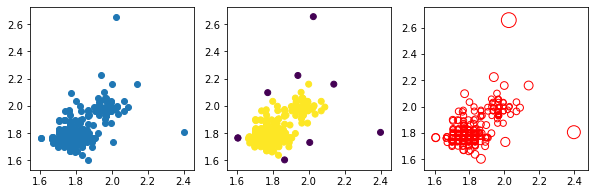

In [ ]:
plt.figure(figsize=(10, 3))
plt.subplot(131).scatter(X,Y)
plt.subplot(132).scatter(X,Y,c=y_pred)
plt.subplot(133).scatter(X,Y,s=30*np.abs(clf.negative_outlier_factor_),facecolors='none',edgecolors='r')

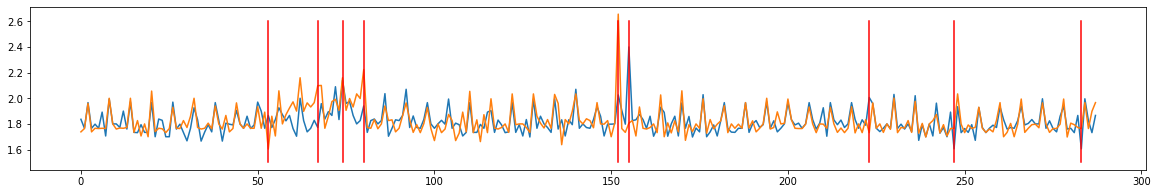

In [ ]:
plt.figure(figsize=(20, 3))
plt.plot(X)
plt.plot(Y)
for  i in range(len(y_pred)):
  if y_pred[i] == -1:
    plt.plot([i,i],[1.5,2.6],'r-')

ใน Document ของ Sklearn ระบุไว้ว่าให้ดูที่ค่า negative_outlier_factor หากค่าติดลบมากแสดงว่ามีความเป็น Outlier มากรายละเอียดสามารถอ่านได้จาก https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          3.,   0.,   3.,   2.,   7.,  21.,  41., 208.]),
 array([-7.33313198, -7.11986666, -6.90660134, -6.69333601, -6.48007069,
        -6.26680537, -6.05354004, -5.84027472, -5.6270094 , -5.41374407,
        -5.20047875, -4.98721343, -4.7739481 , -4.56068278, -4.34741746,
        -4.13415213, -3.92088681, -3.70762149, -3.49435616, -3.28109084,
        -3.06782552, -2.8545602 , -2.64129487, -2.42802955, -2.21476423,
        -2.0014989 , -1.78823358, -1.57496826, -1.36170293, -1.14843761,
        -0.93517229]),
 <a list of 30 Patch objects>)

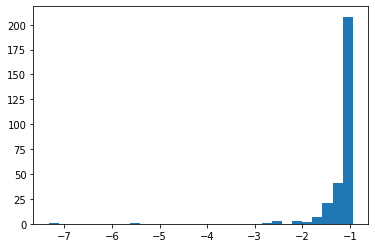

In [ ]:
plt.hist(clf.negative_outlier_factor_,bins=30)

In [ ]:
for  i in range(len(y_pred)):
  if y_pred[i] == -1:
    print(clf.negative_outlier_factor_[i])

-2.5979700342809027
-2.0250792148408694
-2.609846413815471
-2.6210776961225593
-7.3331319827185695
-5.604347508246786
-2.759711943191045
-2.063994649702109
-2.062010555481954
